## **Problem Definition**

Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.




### **Dataset Description**

The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

The Attributes are:

* CustomerID
* CustomerGender
* CustomerAge
* CustomerCity
* AnnualIncome
* CreditScore
* SpendingScore
* CustomerCityID

### **Tasks to be performed**


* Importing Required Libraries
* Analyzing the data
* Understanding K-Means
* Implementing K-Means from Scratch
* Implementing K-Means using sklearn library 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [92]:
df=pd.read_csv('Data/Shopping_CustomerData.csv')
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [93]:
df=pd.read_csv('Data/Shopping_CustomerData.csv')

df=df.iloc[:,[1,2,3,4,5,6]]

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
                    #('tnf1',SimpleImputer(),['xx']),
                    #('tnf2',OrdinalEncoder(),['CustomerCityID']),
                    ('MnMx', MinMaxScaler(), ['CustomerAge', 'AnnualIncome', 'CreditScore', 'SpendingScore']),
                    ('OHE',OneHotEncoder(sparse=False,handle_unknown='ignore'),['CustomerGender','CustomerCity'])]
                        , remainder='passthrough')

X=transformer.fit_transform(df)

kmean=KMeans(n_clusters=3,max_iter=400).fit(X)

lables=kmean.predict(X)

K_DF=df.copy()

K_DF['lable']=lables

K_DF

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,lable
0,Male,49,Bengaluru,527547.58850,653,78,0
1,Male,59,Bengaluru,207143.19760,630,63,0
2,Female,54,Delhi,164423.84570,555,69,1
3,Female,42,Bengaluru,56220.36443,699,30,2
4,Female,30,Bengaluru,256194.36190,793,6,2
...,...,...,...,...,...,...,...
195,Female,54,Delhi,317466.42070,601,52,1
196,Female,20,Bengaluru,323305.50020,554,58,2
197,Male,44,Chennai,109058.54430,844,36,0
198,Male,28,Delhi,160116.89300,837,24,0


In [94]:
import plotly_express as px
px.scatter_3d(K_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', color='lable')

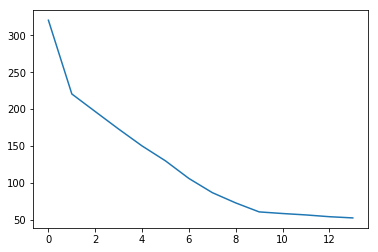

In [95]:
inertias=[]
for i in range(1,15):
    kmean=KMeans(n_clusters=i,max_iter=500, algorithm='auto' ).fit(X)
    inertias.append(kmean.inertia_)
    
plt.plot(inertias)
        

In [96]:
kmean=KMeans(n_clusters=10,max_iter=400).fit(X)

lables=kmean.predict(X)

K_DF=df.copy()

K_DF['lable']=lables

score = silhouette_score(X,lables)
print ("Silhouette Score", score)



px.scatter_3d(K_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', color='lable')

Silhouette Score 0.5234147443513107


# Gaussian Mixture 

- Here we use AIC and BIC to evaluate model


In [97]:
X=transformer.fit_transform(df)

GM=GaussianMixture(n_components=3,init_params='kmeans',max_iter=300).fit(X)

lables=GM.predict(X)

GM_DF=df.copy()

GM_DF['lable']=lables

px.scatter_3d(GM_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', color='lable')

# Using AIC to evaluate model

- chart also shows lowest AIC is on 10 cluster

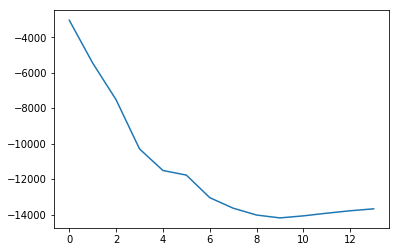

In [98]:
AIC=[]
for i in range(1,15):
    GM=GaussianMixture(n_components=i,max_iter=500).fit(X)
    AIC.append(GM.aic(X))
    
plt.plot(AIC)
        

In [99]:
X=transformer.fit_transform(df)

GM=GaussianMixture(n_components=4,init_params='kmeans',max_iter=300).fit(X)

lables=GM.predict(X)

GM_DF=df.copy()

GM_DF['lable']=lables

score = silhouette_score(X,lables)
print ("Silhouette Score", score)


px.scatter_3d(GM_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', color='lable', size='AnnualIncome')

Silhouette Score 0.20848798759442752


- let's remove City from model

In [104]:

df=pd.read_csv('Data/Shopping_CustomerData.csv')

DF=df.iloc[:,[1,2,4,5,6]]

transformer=ColumnTransformer([
                                ('OHE', OneHotEncoder(sparse=False,handle_unknown='ignore'),['CustomerGender']),
                                ('MnMx', MinMaxScaler(), ['AnnualIncome','CreditScore', 'SpendingScore','CustomerAge'])],
                                remainder='passthrough'
                                                )

X=transformer.fit_transform(DF)

GM=GaussianMixture(n_components=6,init_params='kmeans',max_iter=300).fit(X)

lables=GM.predict(X)

GM_DF=df.copy()

GM_DF['lable']=lables

score = silhouette_score(X,lables)
print ("Silhouette Score", score)


print(GM.aic(X))

px.scatter_3d(GM_DF, 'CustomerAge', 'CreditScore', 'CustomerGender', color='lable')




Silhouette Score 0.18214601349591297
-4103.434931732772


In [101]:
px.scatter_3d(GM_DF, 'CustomerAge', 'CreditScore', 'SpendingScore', color='lable', size='AnnualIncome')


# DBSCAN

- There are severl outliers, for instance 21 and 22 years old with ~700K annual income and low credit Score

In [108]:
from sklearn.cluster import DBSCAN

DB=DBSCAN(min_samples=8, eps=0.4)
DB.fit(X)

print(len(set(DB.labels_)))

DB_DF=df.copy()

DB_DF['lable']=DB.labels_

score = silhouette_score(X,DB.labels_)
print ("Silhouette Score", score)


px.scatter_3d(DB_DF, 'CustomerAge', 'CreditScore', 'SpendingScore', color='lable', 
              hover_data=DB_DF.columns, size='AnnualIncome')


3
Silhouette Score 0.38190974970793895


In [131]:
GM=GaussianMixture(n_components=10,init_params='kmeans').fit(X)

lables=GM.predict(X)

GM_DF=df.copy()

GM_DF['lable']=lables
score = silhouette_score(X,lables)
print ("Silhouette Score", score)

print(GM.aic(X))

px.scatter_3d(GM_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', 
              color='lable', hover_data=df.columns, size='AnnualIncome')


Silhouette Score 0.1661342013319299
-3992.9473265449997


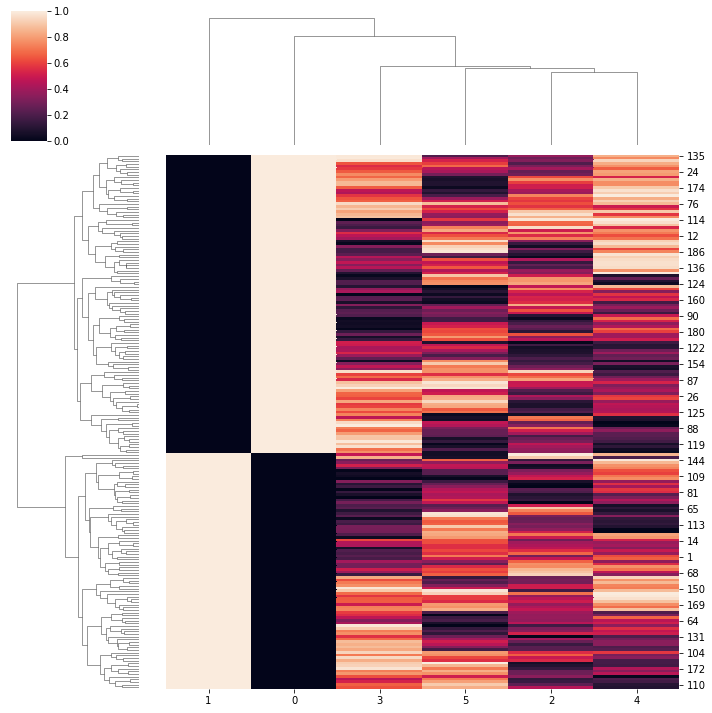

In [113]:
import seaborn as sns 


sns.clustermap(X)

## Call hierarchical clustering, linkage can be = ['complete', 'average', 'ward']


In [84]:
from math import sqrt
from sklearn.metrics import silhouette_score
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [132]:
linkage_style= ['complete', 'average', 'ward']


agglomerative = cluster.AgglomerativeClustering(n_clusters=9, linkage=linkage_style[1], affinity='euclidean')
model = agglomerative.fit_predict(X)
lables= agglomerative.labels_ 

HA=df.copy()

HA['lable']=lables

score = silhouette_score(X,lables)
print ("Silhouette Score", score)

px.scatter_3d(HA, 'CustomerAge', 'CreditScore', 'CustomerGender', color='lable')


Silhouette Score 0.18056726379993399


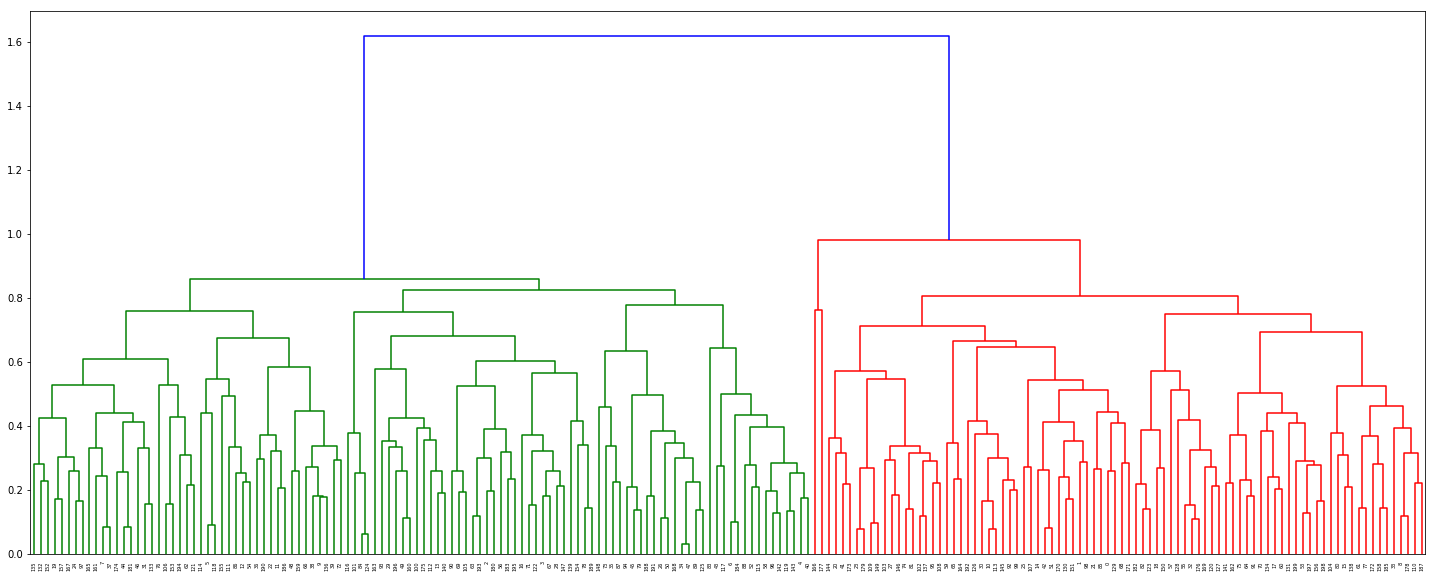

In [133]:
Z = linkage(X, linkage_style[1])
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [153]:
from sklearn.cluster import MiniBatchKMeans

df=pd.read_csv('Data/Shopping_CustomerData.csv')

DF=df.iloc[:,[1,2,4,5,6]]

X=transformer.fit_transform(DF)

miniKM=MiniBatchKMeans(n_clusters=5 ,batch_size=5).fit(X)

lables=miniKM.predict(X)

MK_DF=df.copy()

MK_DF['lable']=lables


score = silhouette_score(X,lables)
print ("Silhouette Score", score)


px.scatter_3d(MK_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', 
              color='lable', hover_data=df.columns)

Silhouette Score 0.1967452736849934


In [161]:
from sklearn.cluster import Birch

BR=Birch(n_clusters=5,threshold=0.3, branching_factor=20).fit(X)

lables=BR.predict(X)

BR_DF=df.copy()

BR_DF['lable']=lables


score = silhouette_score(X,lables)
print ("Silhouette Score", score)


px.scatter_3d(BR_DF, 'CustomerAge', 'CreditScore', 'CustomerCity', 
              color='lable', hover_data=df.columns)

Silhouette Score 0.14113969557786604
